In [1]:
from mpl_toolkits.mplot3d.art3d import Line3DCollection

import sys
sys.path.append("../../src")
import os
import numpy as np
import pickle
from example_thomas import simulate_thomas, get_thomas_data, generate_thomas_data
from example_lorenz import simulate_lorenz, get_lorenz_data, generate_lorenz_data

from autoencoder import full_network
from training import create_feed_dictionary
from sindy_utils import sindy_simulate

# compatibility issues
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#import tensorflow as tf


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


# Testing the simulate_thomas() function

[-0.81327479  2.23877183  0.08596224]


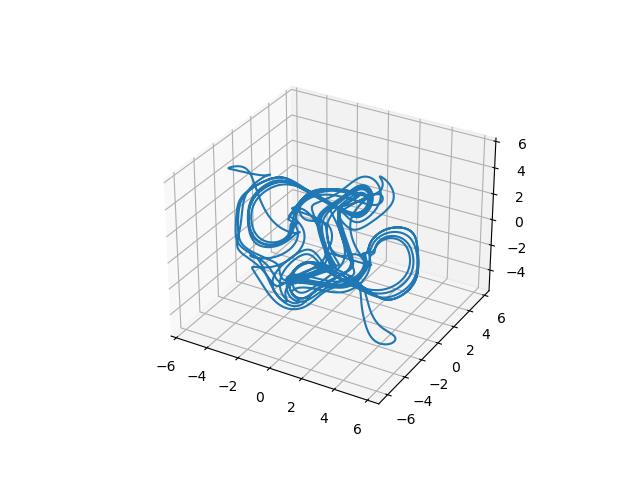

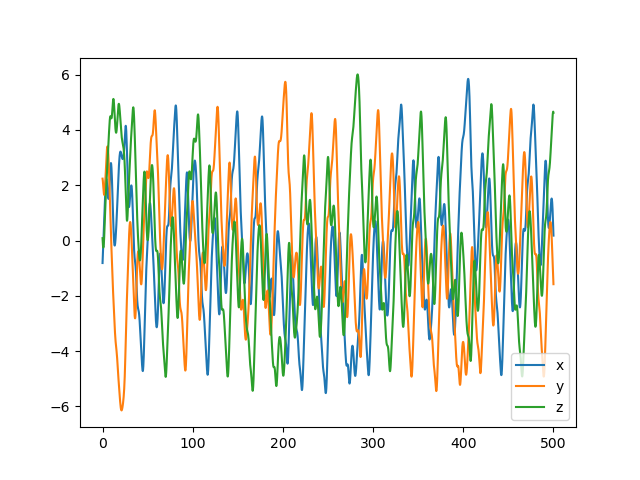

In [45]:
%matplotlib widget

t = np.linspace(0, 500, 5000)

x0 = np.random.uniform(-3, 3, size=(1, 3))[0]
print(x0)

sim_1 = simulate_thomas(x0, t, b = 0.1)

z, dz, ddz = sim_1


fig = plt.figure()
ax = plt.axes(projection='3d')


xdata = z[:,0]
ydata = z[:,1]
zdata = z[:,2]


ax.plot3D(xdata, ydata, zdata)
#fig.show()

fig2 = plt.figure()

plt.plot(t, xdata, label = "x")
plt.plot(t, ydata, label = "y")
plt.plot(t, zdata, label = "z")
plt.legend()
#fig2.show()
#


[ 2.38083922 -2.46428517  2.19337804]


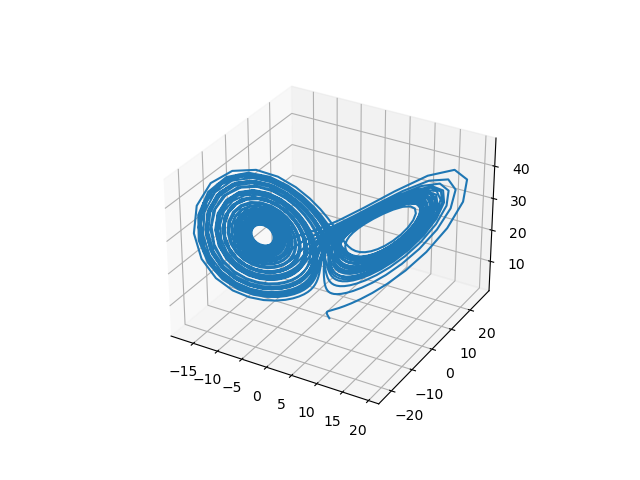

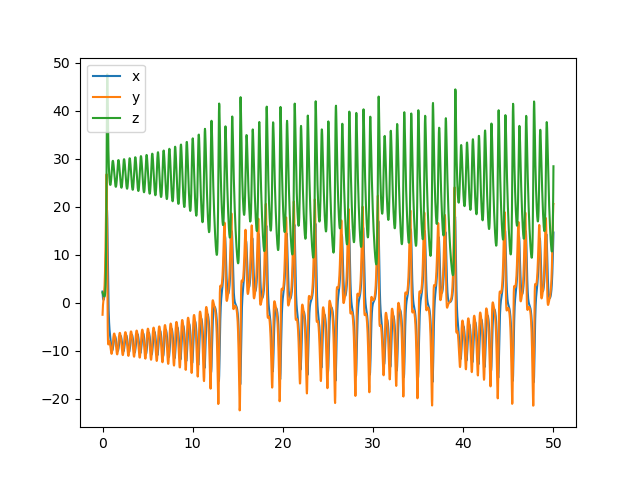

In [57]:
%matplotlib widget

t = np.linspace(0, 50, 2000)

x0 = np.random.uniform(-3, 3, size=(1, 3))[0]
print(x0)

sim_1 = simulate_lorenz(x0, t)

z, dz, ddz = sim_1


fig = plt.figure()
ax = plt.axes(projection='3d')


xdata = z[:,0]
ydata = z[:,1]
zdata = z[:,2]


ax.plot3D(xdata, ydata, zdata)
#fig.show()

fig2 = plt.figure()

plt.plot(t, xdata, label = "x")
plt.plot(t, ydata, label = "y")
plt.plot(t, zdata, label = "z")
plt.legend()
#fig2.show()
#


# Testing generate_thomas_data()

In [47]:
n_ics = 50
noise_strength=0

t = np.arange(0, 500, .2)
t = np.linspace(0, 500, 5000) # to be consistent with the previous test

n_steps = t.size
input_dim = 10

ic_means = np.array([0,0,25])
ic_widths = 2*np.array([36,48,41])

# training data
ics = ic_widths*(np.random.rand(n_ics, 3)-.5) + ic_means
data = generate_thomas_data(ics, t, input_dim, linear=True)


print(data['x'].shape)

(50, 5000, 10)


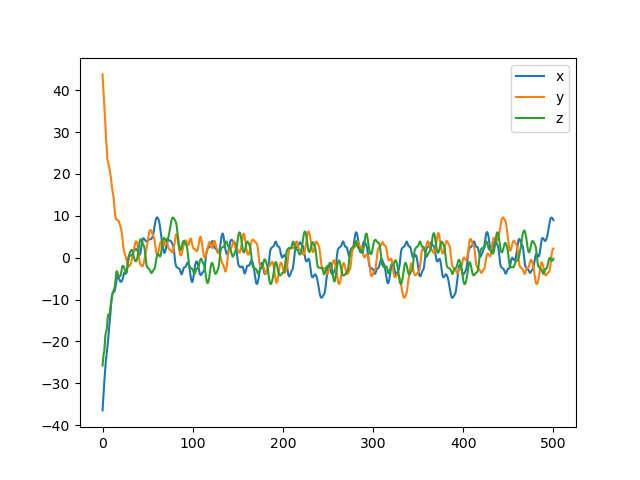

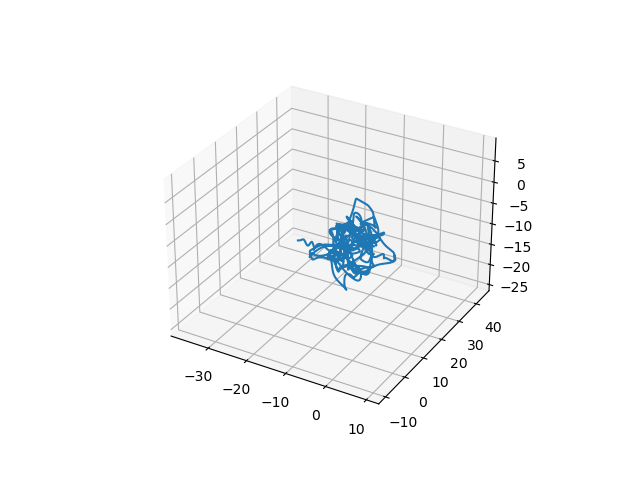

In [48]:
%matplotlib widget


# the second component is the time for sure

xdata = data['x'][1,:,1]
ydata = data['x'][2,:,1]
zdata = data['x'][3,:,1]



plt.plot(t, xdata , label = "x")
plt.plot(t, ydata , label = "y")
plt.plot(t, zdata , label = "z")

plt.legend()
#plt.show()

##### plot 3D


fig = plt.figure()
ax = plt.axes(projection='3d')





ax.plot3D(xdata, ydata, zdata)
#fig.show()


In [58]:
n_ics = 50
noise_strength=0

t = np.arange(0, 50, .02)
t = np.linspace(0, 50, 2000) # to be consistent with the previous test

n_steps = t.size
input_dim = 10

ic_means = np.array([0,0,25])
ic_widths = 2*np.array([36,48,41])

# training data
ics = ic_widths*(np.random.rand(n_ics, 3)-.5) + ic_means
data = generate_lorenz_data(ics, t, input_dim, linear=True)



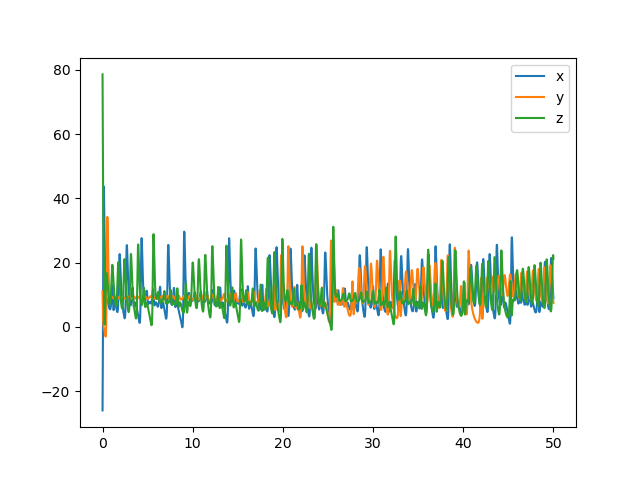

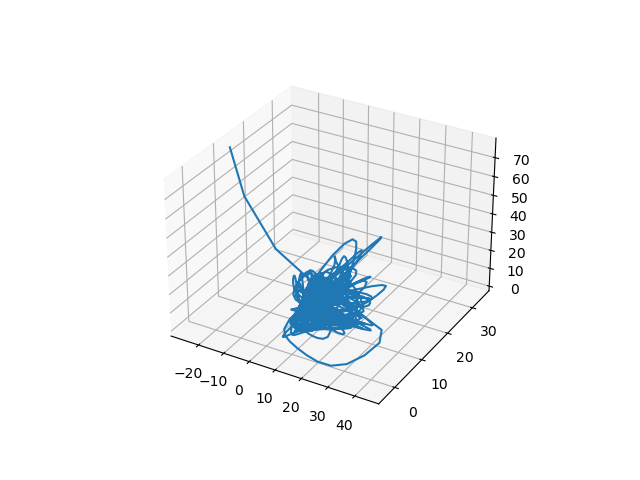

In [59]:
%matplotlib widget

# the second component is the time for sure

xdata = data['x'][1,:,1]
ydata = data['x'][2,:,1]
zdata = data['x'][3,:,1]



plt.plot(t, xdata , label = "x")
plt.plot(t, ydata , label = "y")
plt.plot(t, zdata , label = "z")

plt.legend()
plt.show()

##### plot 3D


fig = plt.figure()
ax = plt.axes(projection='3d')





ax.plot3D(xdata, ydata, zdata)
#fig.show()


# Test the trained model

In [2]:
data_path = os.getcwd() + '/'
save_name = 'model1'
save_name = 'lorenz_2023_01_12_19_55_27_830933'  # name of the last model trained

params = pickle.load(open(data_path + save_name + '_params.pkl', 'rb'))
params['save_name'] = data_path + save_name

autoencoder_network = full_network(params)
learning_rate = tf.placeholder(tf.float32, name='learning_rate')
saver = tf.train.Saver(var_list=tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES))

tensorflow_run_tuple = ()
for key in autoencoder_network.keys():
    tensorflow_run_tuple += (autoencoder_network[key],)

## Single trajectory plots

In [3]:
t = np.arange(0,20,.01)
t = np.linspace(0, 500, 5000) # keeping it conscistent 


z0 = np.array([[-8,7,27]])

test_data = generate_thomas_data(z0, t, params['input_dim'], linear=False, normalization=np.array([1/40,1/40,1/40]))
test_data['x'] = test_data['x'].reshape((-1,params['input_dim']))
test_data['dx'] = test_data['dx'].reshape((-1,params['input_dim']))
test_data['z'] = test_data['z'].reshape((-1,params['latent_dim']))
test_data['dz'] = test_data['dz'].reshape((-1,params['latent_dim']))

In [4]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, data_path + save_name)
    test_dictionary = create_feed_dictionary(test_data, params)
    tf_results = sess.run(tensorflow_run_tuple, feed_dict=test_dictionary)

test_set_results = {}
for i,key in enumerate(autoencoder_network.keys()):
    test_set_results[key] = tf_results[i]

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

INFO:tensorflow:Restoring parameters from /Users/aygalic/OneDrive/polimi/COURSES/S10/Computational Stats/SindyAutoencoders_v2/examples/thomas/lorenz_2023_01_12_19_55_27_830933


2023-01-12 20:31:20.548071: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-12 20:31:20.548654: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-01-12 20:31:20.561335: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2023-01-12 20:31:20.569013: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-12 20:31:20.574442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-12 20:31:20.626327: I tensorflow/core/grappler/optimizers/custom_graph

## Affine transformation of SINDy param

This part is not detailed in the original SINDy autoencoder paper but on the appendix 
https://www.pnas.org/doi/suppl/10.1073/pnas.1906995116/suppl_file/pnas.1906995116.sapp.pdf


One of the main thing to keep in mind being that you need a decent model where you can identify the params in order to manually provide a linear combinaison of those that could then be used in order to simulate the identified system.

In [7]:
import seaborn as sns

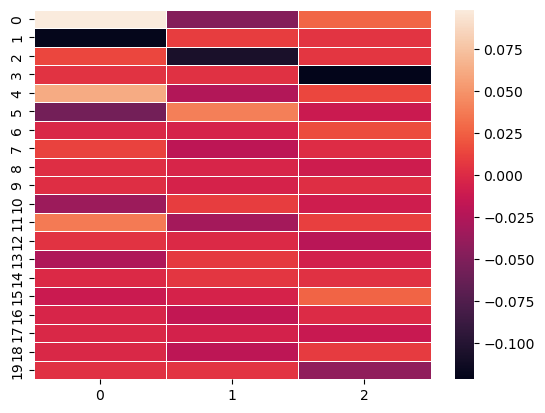

In [8]:
coefs_ = test_set_results['sindy_coefficients']
ax = sns.heatmap(coefs_, linewidth=0.5)


In [ ]:
a1 = 1
a2 = test_data['sindy_coefficients'][2,0]/test_set_results['sindy_coefficients'][2,0]
a3 = np.sqrt(-test_set_results['sindy_coefficients'][5,2]/test_set_results['sindy_coefficients'][6,1]*a2**2)
b3 = -test_set_results['sindy_coefficients'][0,2]/test_set_results['sindy_coefficients'][3,2]

sindy_coefficients_transformed = np.zeros(test_set_results['sindy_coefficients'].shape)
sindy_coefficients_transformed[1,0] = test_set_results['sindy_coefficients'][1,0]
sindy_coefficients_transformed[2,0] = test_set_results['sindy_coefficients'][2,0]*a2/a1
sindy_coefficients_transformed[1,1] = test_set_results['sindy_coefficients'][6,1]*a1/a2*b3
sindy_coefficients_transformed[2,1] = test_set_results['sindy_coefficients'][2,1]
sindy_coefficients_transformed[6,1] = test_set_results['sindy_coefficients'][6,1]*a1*a3/a2
sindy_coefficients_transformed[3,2] = test_set_results['sindy_coefficients'][3,2]
sindy_coefficients_transformed[5,2] = test_set_results['sindy_coefficients'][5,2]*a1*a2/a3

z0_transformed = np.array([test_set_results['z'][0,0]/a1,
                           test_set_results['z'][0,1]/a2,
                           (test_set_results['z'][0,2] - b3)/a3])

In [76]:
a1 = 1
a2 = test_data['sindy_coefficients'][2,0]/test_set_results['sindy_coefficients'][2,0]
a3 = np.sqrt(-test_set_results['sindy_coefficients'][5,2]/test_set_results['sindy_coefficients'][6,1]*a2**2)
b3 = -test_set_results['sindy_coefficients'][0,2]/test_set_results['sindy_coefficients'][3,2]

sindy_coefficients_transformed = np.zeros(test_set_results['sindy_coefficients'].shape)
sindy_coefficients_transformed[1,0] = test_set_results['sindy_coefficients'][1,0]
sindy_coefficients_transformed[2,0] = test_set_results['sindy_coefficients'][2,0]*a2/a1
sindy_coefficients_transformed[1,1] = test_set_results['sindy_coefficients'][6,1]*a1/a2*b3
sindy_coefficients_transformed[2,1] = test_set_results['sindy_coefficients'][2,1]
sindy_coefficients_transformed[6,1] = test_set_results['sindy_coefficients'][6,1]*a1*a3/a2
sindy_coefficients_transformed[3,2] = test_set_results['sindy_coefficients'][3,2]
sindy_coefficients_transformed[5,2] = test_set_results['sindy_coefficients'][5,2]*a1*a2/a3

z0_transformed = np.array([test_set_results['z'][0,0]/a1,
                           test_set_results['z'][0,1]/a2,
                           (test_set_results['z'][0,2] - b3)/a3])

/var/folders/xr/0fvz4r2s4wx1hx13jlhxj2z00000gn/T/ipykernel_40727/957513862.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  sindy_coefficients_transformed[1,1] = test_set_results['sindy_coefficients'][6,1]*a1/a2*b3
/var/folders/xr/0fvz4r2s4wx1hx13jlhxj2z00000gn/T/ipykernel_40727/957513862.py:11: RuntimeWarning: invalid value encountered in double_scalars
  sindy_coefficients_transformed[6,1] = test_set_results['sindy_coefficients'][6,1]*a1*a3/a2
/var/folders/xr/0fvz4r2s4wx1hx13jlhxj2z00000gn/T/ipykernel_40727/957513862.py:13: RuntimeWarning: invalid value encountered in double_scalars
  sindy_coefficients_transformed[5,2] = test_set_results['sindy_coefficients'][5,2]*a1*a2/a3
/var/folders/xr/0fvz4r2s4wx1hx13jlhxj2z00000gn/T/ipykernel_40727/957513862.py:16: RuntimeWarning: divide by zero encountered in float_scalars
  test_set_results['z'][0,1]/a2,
/var/folders/xr/0fvz4r2s4wx1hx13jlhxj2z00000gn/T/ipykernel_40727/957513862.py:17: RuntimeWarning: divide by zero encount

In [82]:
test_set_results['sindy_coefficients']

array([[ 0.11987261, -0.41204458,  0.00764321],
       [ 0.01163562, -0.34873042,  0.03953822],
       [ 0.23502019, -0.21135136,  0.09444784],
       [ 0.04393585, -0.59813315, -0.09717713],
       [ 0.7149333 ,  0.01360189,  0.31824774],
       [ 0.63109595,  0.06945212,  0.43331602],
       [ 0.6076441 ,  0.3079952 ,  0.513316  ],
       [ 0.2850357 , -0.28063524,  0.0922994 ],
       [ 0.43807516, -0.07250785,  0.15693164],
       [ 0.26768145, -0.00276927,  0.5157524 ],
       [ 0.40868878, -0.11937579,  0.10928304],
       [ 0.574418  ,  0.10981827,  0.35638222],
       [ 0.71941507,  0.34826654,  0.5357328 ],
       [ 0.34768033, -0.1718373 ,  0.2284062 ],
       [ 0.7461914 ,  0.56908685,  0.66274166],
       [ 0.5201462 ,  0.54086053,  0.67143327],
       [ 0.15875804, -0.35769686,  0.06562258],
       [ 0.24757464, -0.31889492, -0.01490272],
       [ 0.24409841,  0.01210138,  0.3157015 ],
       [ 0.19468273, -0.05113235,  0.45161563]], dtype=float32)

In [81]:
sindy_coefficients_transformed

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.01163562,         inf,  0.        ],
       [ 0.        , -0.21135136,  0.        ],
       [ 0.        ,  0.        , -0.09717713],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,         nan],
       [ 0.        ,         nan,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ]])

In [84]:
z0_transformed

array([-0.13135923,        -inf,        -inf])

In [79]:
thomas_sim = sindy_simulate(test_data['z'][0], t, test_data['sindy_coefficients'],
                            params['poly_order'], params['include_sine'])
z_sim = sindy_simulate(test_set_results['z'][0], t, params['coefficient_mask']*test_set_results['sindy_coefficients'],
                       params['poly_order'], params['include_sine'])
z_sim_transformed = sindy_simulate(z0_transformed, t, sindy_coefficients_transformed,
                                   params['poly_order'], params['include_sine'])

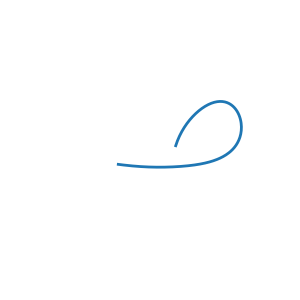

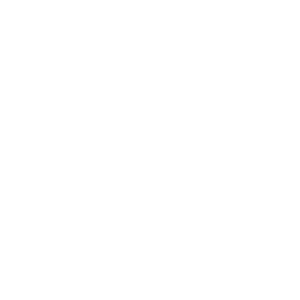

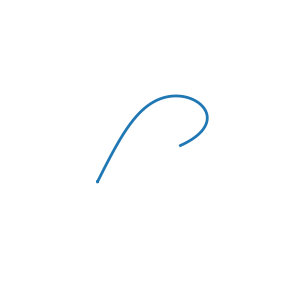

In [80]:
fig1 = plt.figure(figsize=(3,3))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot(z_sim[:,0], z_sim[:,1], z_sim[:,2], linewidth=2)
plt.axis('off')
ax1.view_init(azim=120)

fig2 = plt.figure(figsize=(3,3))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot(z_sim_transformed[:,0], z_sim_transformed[:,1], z_sim_transformed[:,2], linewidth=2)
plt.axis('off')
ax2.view_init(azim=120)

fig3 = plt.figure(figsize=(3,3))
ax3 = fig3.add_subplot(111, projection='3d')
ax3.plot(thomas_sim[:,0], thomas_sim[:,1], thomas_sim[:,2], linewidth=2)
plt.xticks([])
plt.axis('off')
ax3.view_init(azim=120)

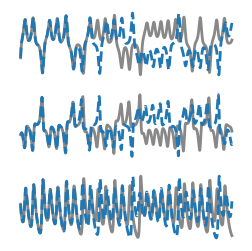

In [8]:
plt.figure(figsize=(3,3))
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.plot(t, test_set_results['z'][:,i], color='#888888', linewidth=2)
    plt.plot(t, z_sim[:,i], '--', linewidth=2)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')

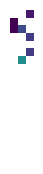

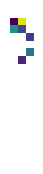

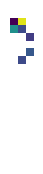

In [9]:
Xi_plot = (params['coefficient_mask']*test_set_results['sindy_coefficients'])
Xi_plot[Xi_plot==0] = np.inf
plt.figure(figsize=(1,2))
plt.imshow(Xi_plot, interpolation='none')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.clim([-10,30])

Xi_transformed_plot = np.copy(sindy_coefficients_transformed)
Xi_transformed_plot[Xi_transformed_plot==0] = np.inf
plt.figure(figsize=(1,2))
plt.imshow(Xi_transformed_plot, interpolation='none')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.clim([-10,30])

Xi_true_plot = np.copy(test_data['sindy_coefficients'])
Xi_true_plot[Xi_true_plot==0] = np.inf
Xi_true_plot[6,1] = -1.
Xi_true_plot[5,2] = 1.
plt.figure(figsize=(1,2))
plt.imshow(Xi_true_plot, interpolation='none')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.clim([-10,30])

## Test set analysis - in distribution

In [10]:
test_data = get_lorenz_data(100, noise_strength=1e-6)

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, data_path + save_name)
    test_dictionary = create_feed_dictionary(test_data, params)
    tf_results = sess.run(tensorflow_run_tuple, feed_dict=test_dictionary)

test_set_results = {}
for i,key in enumerate(autoencoder_network.keys()):
    test_set_results[key] = tf_results[i]

INFO:tensorflow:Restoring parameters from /Users/aygalic/OneDrive/polimi/COURSES/S10/Computational Stats/SindyAutoencoders_v2/examples/lorenz/model1


2022-12-28 11:47:04.406091: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-28 11:47:04.406158: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-12-28 11:47:04.416270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-28 11:47:04.441773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-28 11:47:04.467604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [12]:
decoder_x_error = np.mean((test_data['x'] - test_set_results['x_decode'])**2)/np.mean(test_data['x']**2)
decoder_dx_error = np.mean((test_data['dx'] - test_set_results['dx_decode'])**2)/np.mean(test_data['dx']**2)
sindy_dz_error = np.mean((test_set_results['dz'] - test_set_results['dz_predict'])**2)/np.mean(test_set_results['dz']**2)

print('Decoder relative error: %f' % decoder_x_error)
print('Decoder relative SINDy error: %f' % decoder_dx_error)
print('SINDy reltive error, z: %f' % sindy_dz_error)

Decoder relative error: 0.000028
Decoder relative SINDy error: 0.000219
SINDy reltive error, z: 0.000865


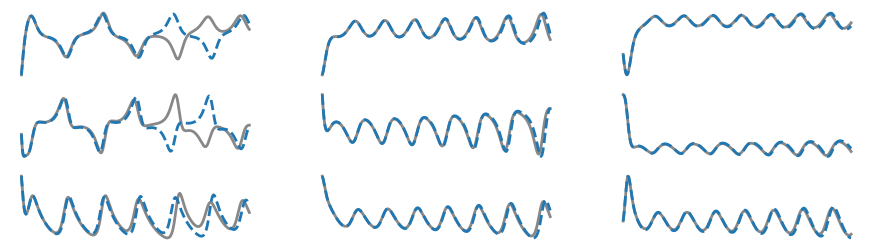

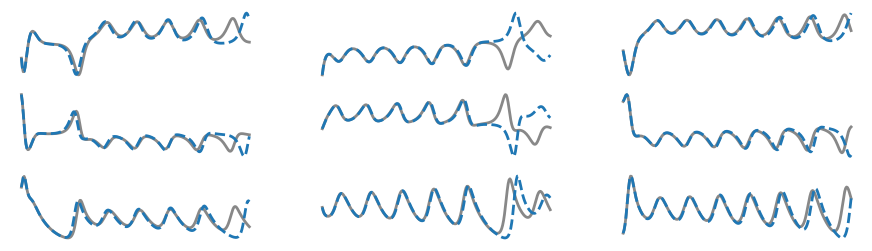

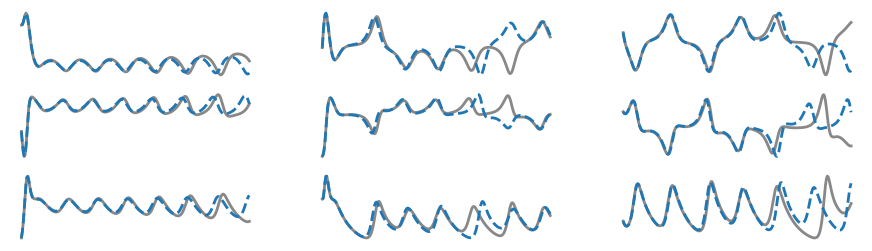

In [13]:
for ic in range(9):
    idxs = np.arange(ic*250,(ic+1)*250)
    
    z_sim = sindy_simulate(test_set_results['z'][250*ic], test_data['t'],
                           params['coefficient_mask']*test_set_results['sindy_coefficients'],
                           params['poly_order'], params['include_sine'])
    
    col_idx = ic % 3
    
    if ic % 3 == 0:
        plt.figure(figsize=(11,3))
    for i in range(3):
        row_idx = i
        subplot_idx = 3*row_idx + col_idx + 1
        plt.subplot(3,3,subplot_idx)
        plt.plot(test_data['t'], test_set_results['z'][idxs,i], color='#888888', linewidth=2)
        plt.plot(test_data['t'], z_sim[:,i], '--', linewidth=2)
        plt.xticks([])
        plt.yticks([])
#         plt.ylim(ylims[i])
        plt.axis('off')

## Test set analysis - out of distribution

In [14]:
inDist_ic_widths = np.array([36,48,41])
outDist_extra_width = np.array([18,24,20])
full_width = inDist_ic_widths + outDist_extra_width

t = np.arange(0, 5, .02)
n_ics = 100

i = 0
ics = np.zeros((n_ics,3))
while i < n_ics:
    
    ic = np.array([np.random.uniform(-full_width[0],full_width[0]),
                   np.random.uniform(-full_width[1],full_width[1]),
                   np.random.uniform(-full_width[2],full_width[2]) + 25])
    if ((ic[0] > -inDist_ic_widths[0]) and (ic[0] < inDist_ic_widths[0])) \
        and ((ic[1] > -inDist_ic_widths[1]) and (ic[1] < inDist_ic_widths[1])) \
        and ((ic[2] > 25-inDist_ic_widths[2]) and (ic[2] < 25+inDist_ic_widths[2])):
        continue
    else:
        ics[i] = ic
        i += 1
        
noise_strength = 1e-6

# training test_data
test_data = generate_lorenz_data(ics, t, params['input_dim'], linear=False, normalization=np.array([1/40,1/40,1/40]))
test_data['x'] = test_data['x'].reshape((-1,params['input_dim']))
test_data['x'] += noise_strength*np.random.normal(size=test_data['x'].shape)
test_data['dx'] = test_data['dx'].reshape((-1,params['input_dim']))
test_data['dx'] += noise_strength*np.random.normal(size=test_data['dx'].shape)

In [15]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, data_path + save_name)
    test_dictionary = create_feed_dictionary(test_data, params)
    tf_results = sess.run(tensorflow_run_tuple, feed_dict=test_dictionary)

test_set_results = {}
for i,key in enumerate(autoencoder_network.keys()):
    test_set_results[key] = tf_results[i]

INFO:tensorflow:Restoring parameters from /Users/aygalic/OneDrive/polimi/COURSES/S10/Computational Stats/SindyAutoencoders_v2/examples/lorenz/model1


2022-12-28 11:47:29.141702: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-28 11:47:29.141774: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-12-28 11:47:29.149493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-28 11:47:29.175911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-28 11:47:29.216440: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [16]:
decoder_x_error = np.mean((test_data['x'] - test_set_results['x_decode'])**2)/np.mean(test_data['x']**2)
decoder_dx_error = np.mean((test_data['dx'] - test_set_results['dx_decode'])**2)/np.mean(test_data['dx']**2)
sindy_dz_error = np.mean((test_set_results['dz'] - test_set_results['dz_predict'])**2)/np.mean(test_set_results['dz']**2)

print('Decoder relative error: %f' % decoder_x_error)
print('Decoder relative SINDy error: %f' % decoder_dx_error)
print('SINDy reltive error, z: %f' % sindy_dz_error)

Decoder relative error: 0.013248
Decoder relative SINDy error: 0.117635
SINDy reltive error, z: 0.095102


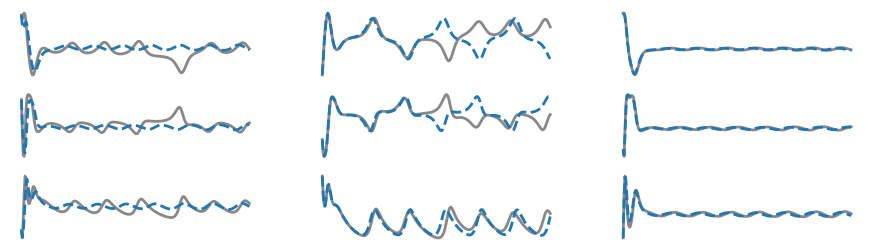

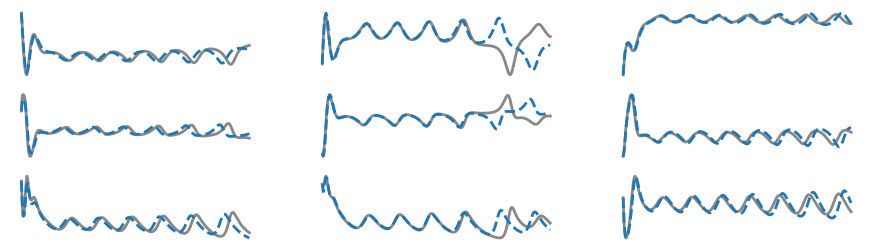

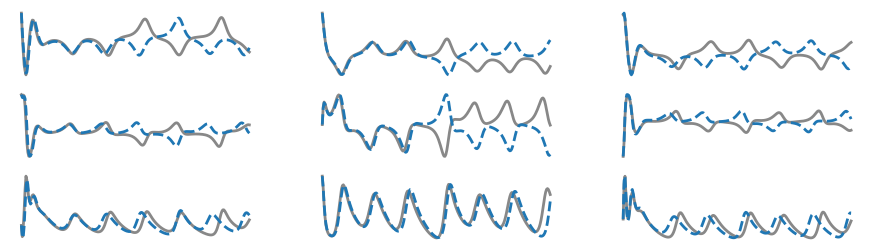

In [17]:
for ic in range(9):
    idxs = np.arange(ic*250,(ic+1)*250)
    
    z_sim = sindy_simulate(test_set_results['z'][250*ic], test_data['t'],
                           params['coefficient_mask']*test_set_results['sindy_coefficients'],
                           params['poly_order'], params['include_sine'])
    
    col_idx = ic % 3
    
    if ic % 3 == 0:
        plt.figure(figsize=(11,3))
    for i in range(3):
        row_idx = i
        subplot_idx = 3*row_idx + col_idx + 1
        plt.subplot(3,3,subplot_idx)
        plt.plot(test_data['t'], test_set_results['z'][idxs,i], color='#888888', linewidth=2)
        plt.plot(test_data['t'], z_sim[:,i], '--', linewidth=2)
        plt.xticks([])
        plt.yticks([])
#         plt.ylim(ylims[i])
        plt.axis('off')